(10.0, 36.0)

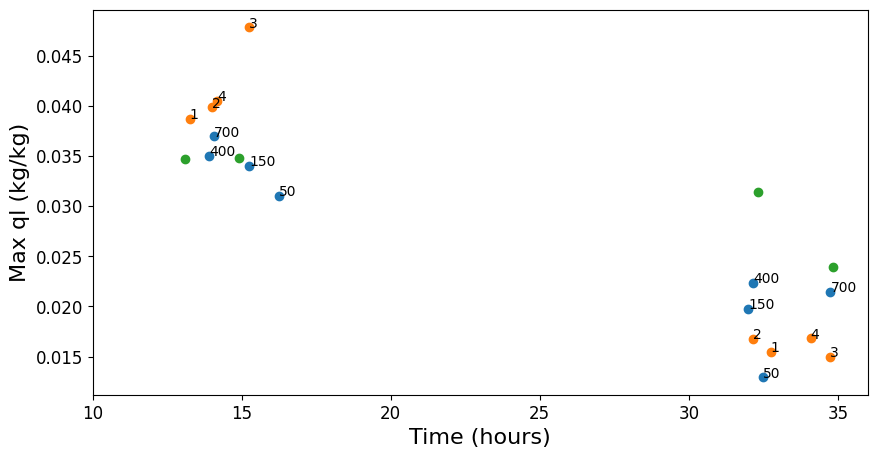

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as pl
from netCDF4 import Dataset
import open_xarray as ox

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 12

ds=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb2nd_1024_150m_8km_50.nc')
ds2=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb2nd_1024_150m_8km_150.nc')
ds3=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb2nd_1024_150m_8km_400.nc')
ds4=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Different_nc0/Feb2nd_1024_150m_8km_700.nc')

output_nc0 = {'1':ds,'2':ds2,'3':ds3,'4':ds4}
nc0=['50','150','400','700']

ds1=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m/eurec4a.default.0000000.nc')
ds2=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_2/eurec4a.default.0000000.nc')
ds3=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_3/eurec4a.default.0000000.nc')
ds4=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_4/eurec4a.default.0000000.nc')
ds5=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_jan31/eurec4a.default.0000000.nc')
ds6=ox.open_xarray('/fs/ess/PFS0220/eurec4a/Case_Runs/Ensemble_Runs/case_feb2nd_1024_150m_jan31_2/eurec4a.default.0000000.nc')

output_ensemble = {'1':ds1,'2':ds2,'3':ds3,'4':ds4}
ensemble=['1','2','3','4']

output_ensemble_jan31 = {'1':ds5,'2':ds6}
ensemble_jan31=['1','2']

time_nc0 = np.zeros(8)
peak_ql_nc0 = np.zeros(8)
i=0
for key in output_nc0:
    time_nc0[i] = (output_nc0[key]['time'].where(output_nc0[key]['ql_path']==output_nc0[key]['ql_path'].max(),drop=True)-output_nc0[key]['time'][0]).dt.seconds.values
    peak_ql_nc0[i] = output_nc0[key]['ql_path'].max().values
    time_nc0[i+len(nc0)] = (output_nc0[key]['time'].where(output_nc0[key]['ql_path']==output_nc0[key]['ql_path'].isel(time=slice(int(72*3600/300),None)).max(),drop=True)\
                        -output_nc0[key]['time'][0]).dt.seconds.values + 86400 
    peak_ql_nc0[i+len(nc0)] = output_nc0[key]['ql_path'].isel(time=slice(int(72*3600/300),None)).max().values
    i=i+1

time_ensemble = np.zeros(8)
peak_ql_ensemble = np.zeros(8)
i=0
for key in output_ensemble:
    time_ensemble[i] = (output_ensemble[key]['time'].where(output_ensemble[key]['ql_path']==output_ensemble[key]['ql_path'].max(),drop=True)-output_ensemble[key]['time'][0]).dt.seconds.values
    peak_ql_ensemble[i] = output_ensemble[key]['ql_path'].max().values
    time_ensemble[i+len(ensemble)] = (output_ensemble[key]['time'].where(output_ensemble[key]['ql_path']==output_ensemble[key]['ql_path'].isel(time=slice(int(96*3600/300),None)).max(),drop=True)\
                        -output_ensemble[key]['time'][0]).dt.seconds.values + 86400 
    peak_ql_ensemble[i+len(ensemble)] = output_ensemble[key]['ql_path'].isel(time=slice(int(96*3600/300),None)).max().values
    i=i+1

time_ensemble_jan31 = np.zeros(4)
peak_ql_ensemble_jan31 = np.zeros(4)
i=0
for key in output_ensemble_jan31:
    time_ensemble_jan31[i] = (output_ensemble_jan31[key]['time'].where(output_ensemble_jan31[key]['ql_path']==output_ensemble_jan31[key]['ql_path'].max(),drop=True)-output_ensemble_jan31[key]['time'][0]).dt.seconds.values
    peak_ql_ensemble_jan31[i] = output_ensemble_jan31[key]['ql_path'].max().values
    time_ensemble_jan31[i+len(ensemble_jan31)] = (output_ensemble_jan31[key]['time'].where(output_ensemble_jan31[key]['ql_path']==output_ensemble_jan31[key]['ql_path'].isel(time=slice(int(72*3600/300),None)).max(),drop=True)\
                        -output_ensemble_jan31[key]['time'][0]).dt.seconds.values + 86400 
    peak_ql_ensemble_jan31[i+len(ensemble_jan31)] = output_ensemble_jan31[key]['ql_path'].isel(time=slice(int(72*3600/300),None)).max().values
    i=i+1

fig,ax = pl.subplots(figsize=(10,5))
ax.scatter(time_nc0/3600,peak_ql_nc0)
for i, txt in enumerate(np.concatenate((nc0,nc0))):
    ax.annotate(txt, (time_nc0[i]/3600,peak_ql_nc0[i]))
ax.scatter(time_ensemble/3600,peak_ql_ensemble)
for i, txt in enumerate(np.concatenate((ensemble,ensemble))):
    ax.annotate(txt, (time_ensemble[i]/3600,peak_ql_ensemble[i]))
ax.scatter(time_ensemble_jan31/3600,peak_ql_ensemble_jan31)
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Max ql (kg/kg)')
pl.xlim(10,36)